In [456]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.preprocessing import StandardScaler


VERİYİ OKUMAK İÇİN YAZDIĞIM FONKSİYON.

In [457]:
def read_file(path):
    dataframe = pd.read_csv(path)
    return dataframe

dataframe=read_file("data.csv")

VERİ ÖN İZLENİMİ İÇİN YAZDIĞIM FONKSİYON.

In [458]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)


VERİYİ GÖRSELLEŞTİRMEK İÇİN YAZDIĞIM BİR FONKSİYON.

In [459]:
def data_visualization(dataframe):
    
    seasons = {
    12: 'winter',1: 'winter',2: 'winter',3: 'spring',4: 'spring',5: 'spring',
    6: 'summer',7: 'summer',8: 'summer',9: 'autumn',10: 'autumn',11: 'autumn',}
    
    dataframe['SEASON'] = dataframe['MONTH'].map( seasons )
    plt.figure(figsize=(20, 11))

    columns = ['SEASON', 'YEAR', 'WEEKDAY', 'QUARTER', 'MONTH', 'WEEKEND']
    titles = ['SEASON Consumption', 'YEAR Consumption', 'WEEKDAY Consumption', 
              'QUARTER Consumption', 'MONTH Consumption', 'WEEKEND Consumption']

    for i, col in enumerate(columns):
        plt.subplot(2, 3, i + 1)
        plt.bar(dataframe[col], dataframe['Consumption (MWh)'])
        plt.title(titles[i], fontsize=11)
        plt.grid()
    
    plt.tight_layout()
    plt.show()
    
    del dataframe['SEASON']

VERİYE TARİH İLE İLGİLİ YENİ ÖZELLİKLER EKLEDĞİM FONKSİYON.

In [460]:
def new_date_features(dataframe):
    
    seasons = {
    12: 'winter',1: 'winter',2: 'winter',3: 'spring',4: 'spring',5: 'spring',
    6: 'summer',7: 'summer',8: 'summer',9: 'autumn',10: 'autumn',11: 'autumn'  }
    
    dataframe['HOUROFDAY'] = dataframe['Date'].dt.hour
    dataframe['QUARTER'] = dataframe['Date'].dt.quarter
    dataframe['DAY'] = dataframe['Date'].dt.day
    dataframe['MONTH'] = dataframe['Date'].dt.month
    dataframe['YEAR'] = dataframe['Date'].dt.year
    dataframe['WEEKDAY'] = dataframe['Date'].dt.weekday
    dataframe['WEEK'] = dataframe['Date'].dt.weekofyear
    dataframe['DAYOFYEAR'] = dataframe['Date'].dt.dayofyear
    dataframe['WEEKEND'] = dataframe['WEEKDAY'].apply( lambda x: 0 if x in [0,1,2,3,4] else 1 )
    dataframe['SEASON'] = dataframe['MONTH'].map( seasons )

    return dataframe

TÜKETİM VERİSİNDEN YENİ VERİLER ÜRETTİĞİM FONKSİYON. 

In [461]:
def new_consumption_features(dataframe):
    
    dataframe['lag1weekafter3days'] = dataframe['Consumption (MWh)'][72:].shift(168)
    dataframe['lag2weekafter3days'] = dataframe['Consumption (MWh)'][72:].shift(336)
    dataframe['lag29days'] = dataframe['Consumption (MWh)'].shift(696)
    dataframe['lag30days'] = dataframe['Consumption (MWh)'].shift(720)
    dataframe['lag31days'] = dataframe['Consumption (MWh)'].shift(744)
    
    dataframe['ma1weekafter3days'] = dataframe['Consumption (MWh)'][72:].rolling(window=168).mean()
    dataframe['ma2weekafter3days'] = dataframe['Consumption (MWh)'][72:].rolling(window=336).mean()
    dataframe['ma29days'] = dataframe['Consumption (MWh)'].rolling(window=696).mean()
    dataframe['ma30days'] = dataframe['Consumption (MWh)'].rolling(window=720).mean()
    dataframe['ma31days'] = dataframe['Consumption (MWh)'].rolling(window=744).mean()
    
    return dataframe

VERİLER ARASINDAKİ KORELASYONU GÖRSELLEŞTİRMEK İÇİN YAZDIĞIM FONKSİYON.

In [462]:
def correlation_matrix(dataframe, cols):
    fig = plt.gcf()
    fig.set_size_inches(20, 16)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    fig = sns.heatmap(dataframe[cols].corr(), annot=True, linewidths=0.5, annot_kws={'size': 12}, linecolor='w', cmap='RdBu')
    plt.show(block=True)

HEDEF KOLON İLE KORELASYONU DÜŞÜK OLAN ÖZELLİKLERİ SİLMEK İÇİN YAZDIĞIM FONKSİYON.

In [463]:
def drop_low_corr_target(dataframe,target_col):
    items_to_remove = []
    for x in dataframe:
        
        if str(dataframe.dtypes[x])  in ['int64','float64','uint8']:
            if  abs(dataframe[x].corr(dataframe['Consumption (MWh)'])) < 0.25:
                items_to_remove.append(x)
    dataframe = dataframe.drop(items_to_remove, axis=1)
    return dataframe

EĞİTİM YAPACAĞIM VERİLERİ SCALE ETMEK İÇİN YAZDIĞIM FONKSİYON.

In [464]:
def scale_data(dataframe):
    scaler = StandardScaler()
    dataframe[dataframe.columns] = scaler.fit_transform(dataframe[dataframe.columns])
    return X

VERİYİ EĞİTİME HAZIRLAMAK İÇİN YAZDIĞIM FONKSİYON.

In [465]:
def data_prep(dataframe):
    
    dataframe['Date'] =pd.to_datetime(dataframe['Date'] +' '+ dataframe['Hour'], format='%d.%m.%Y %H:%M')
    dataframe = dataframe.drop('Hour', axis = 1)
    
    dataframe['Consumption (MWh)']=dataframe['Consumption (MWh)'].str.replace(',','').astype(float)
    dataframe=dataframe.sort_values('Date')
    
    dataframe = new_date_features(dataframe)
    dataframe = new_consumption_features(dataframe)
    dataframe = pd.get_dummies(dataframe, columns=['SEASON'])
    dataframe = dataframe.dropna()
    
    del dataframe['Date']
    
    y = dataframe['Consumption (MWh)']
    X = dataframe.drop(['Consumption (MWh)'], axis=1)
    
    
    return dataframe, X, y

In [466]:
dataframe, X, y = data_prep(dataframe)

In [467]:
check_df(dataframe)

##################### Shape #####################
(34320, 24)
##################### Types #####################
Consumption (MWh)     float64
HOUROFDAY               int64
QUARTER                 int64
DAY                     int64
MONTH                   int64
YEAR                    int64
WEEKDAY                 int64
WEEK                    int64
DAYOFYEAR               int64
WEEKEND                 int64
lag1weekafter3days    float64
lag2weekafter3days    float64
lag29days             float64
lag30days             float64
lag31days             float64
ma1weekafter3days     float64
ma2weekafter3days     float64
ma29days              float64
ma30days              float64
ma31days              float64
SEASON_autumn           uint8
SEASON_spring           uint8
SEASON_summer           uint8
SEASON_winter           uint8
dtype: object
##################### Head #####################
     Consumption (MWh)  HOUROFDAY  QUARTER  DAY  MONTH  YEAR  WEEKDAY  WEEK  \
744           27257.80    

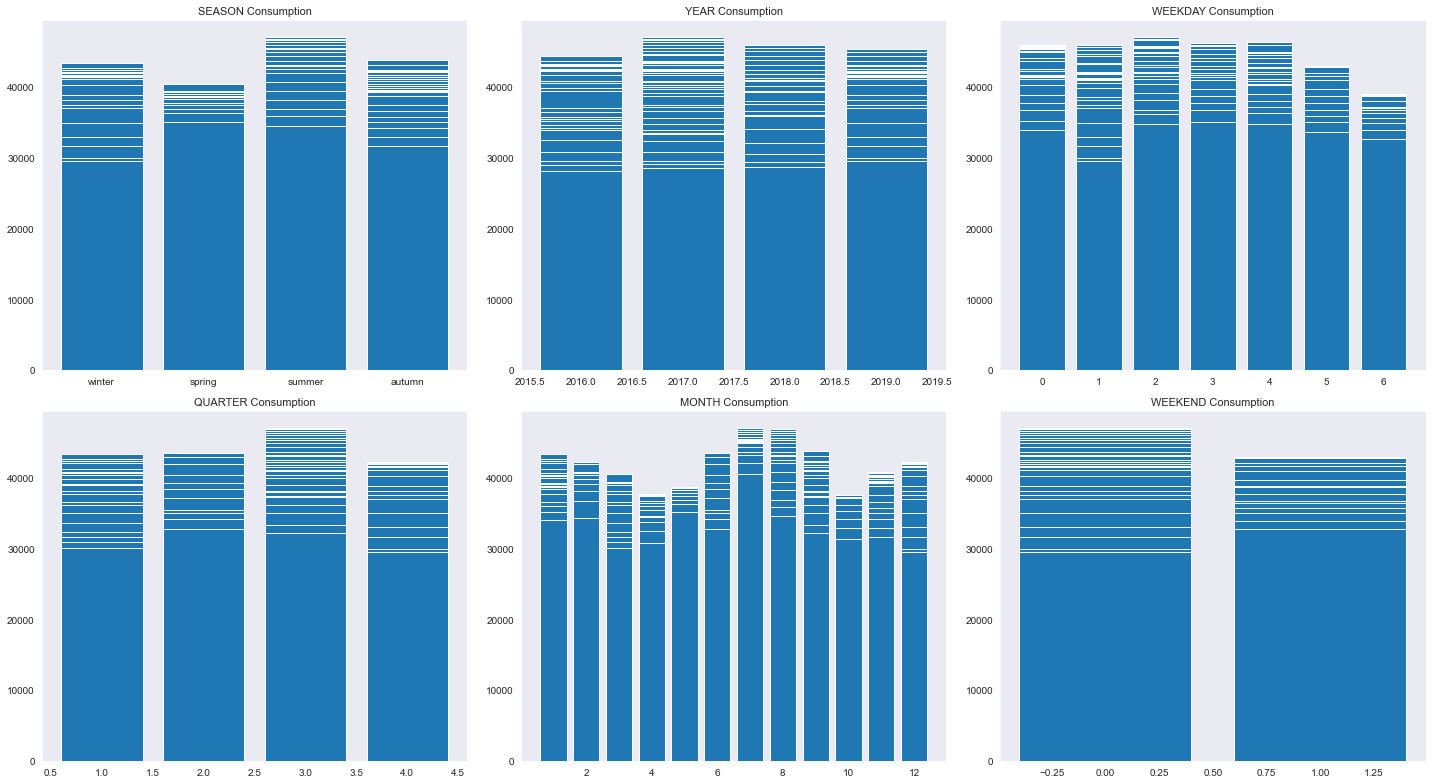

In [468]:
data_visualization(dataframe)

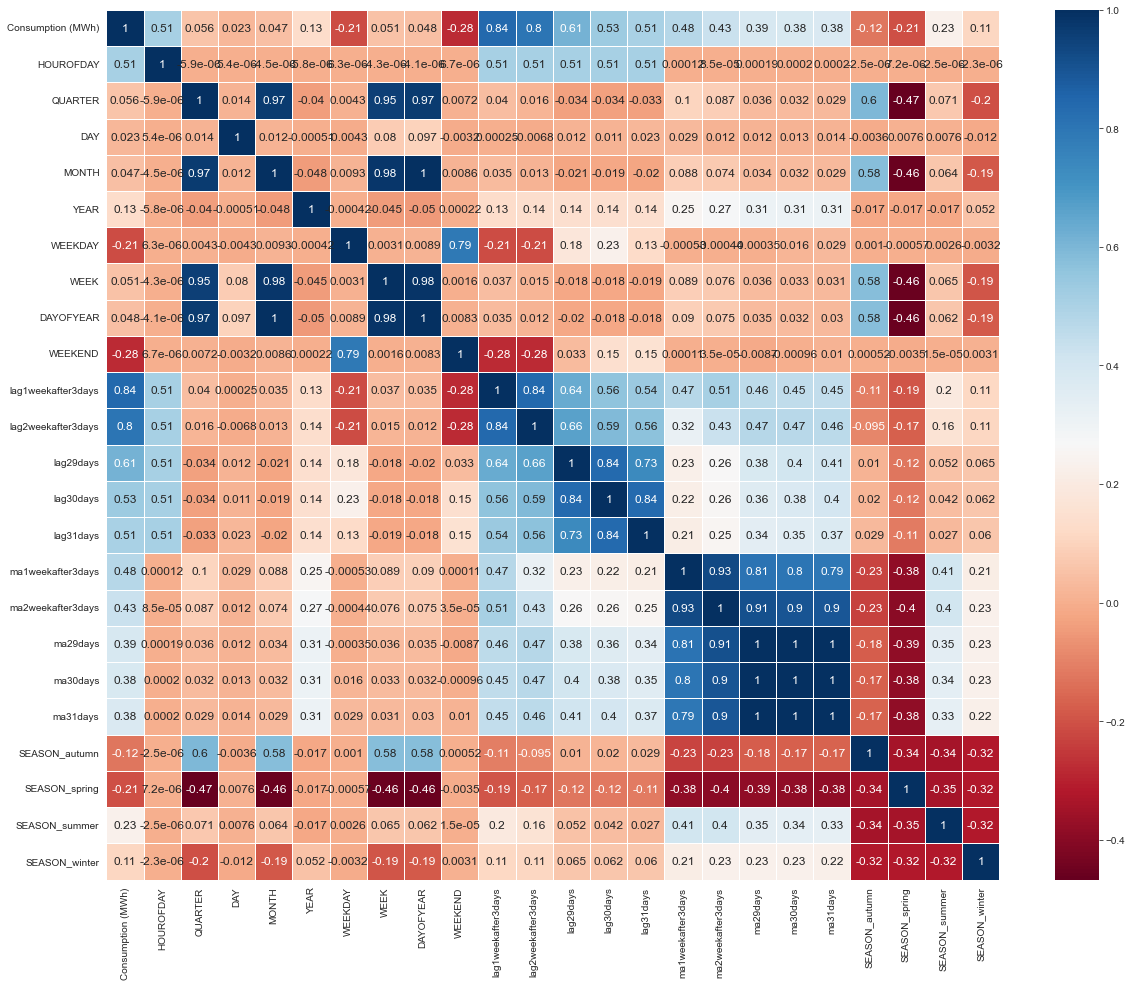

In [469]:
correlation_matrix(dataframe,dataframe.columns)

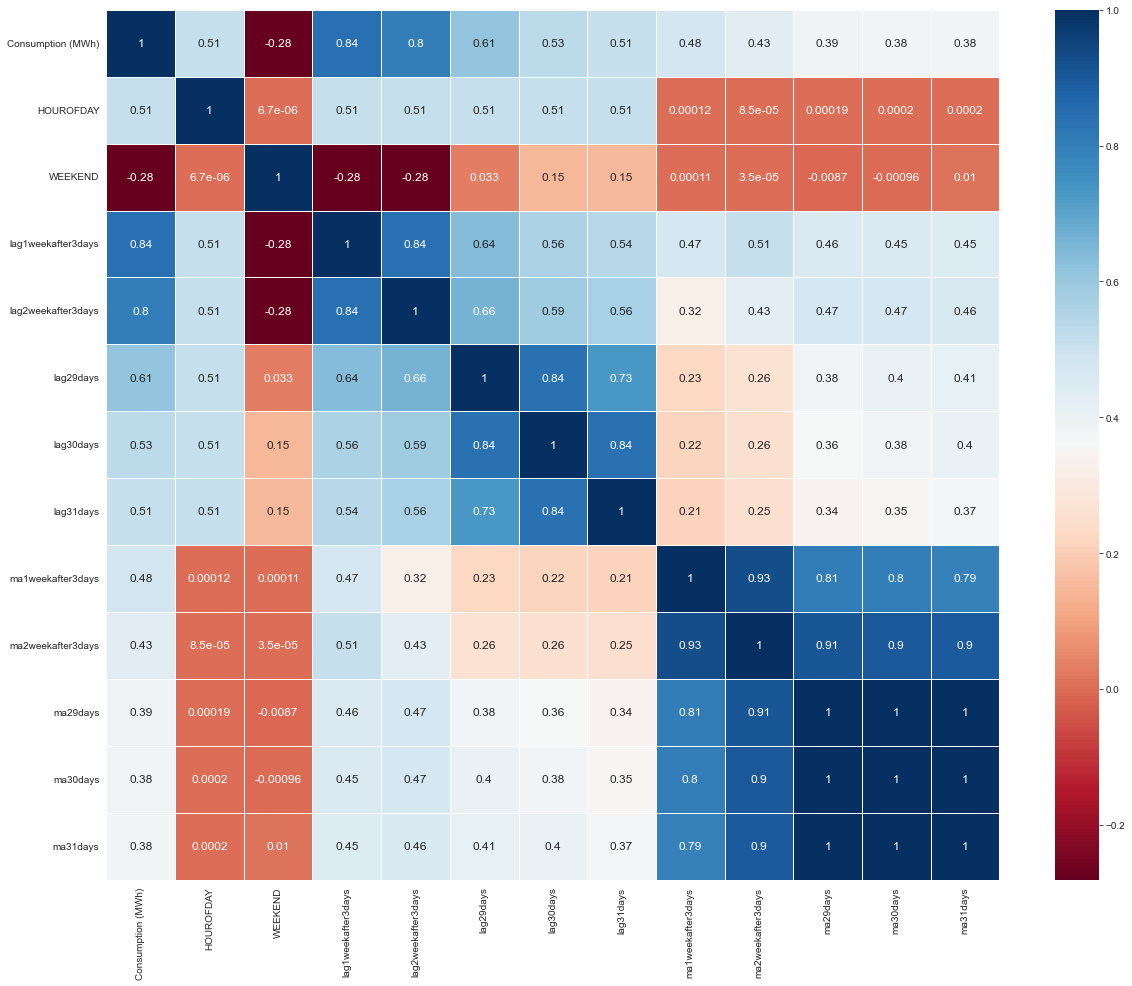

In [470]:
dataframe = drop_low_corr_target(dataframe,dataframe['Consumption (MWh)'])
correlation_matrix(dataframe,dataframe.columns)

In [471]:
X = scale_data(X)

3 FARKLI MODEL İLE EĞİTTİĞİM VE SKORLARINI KARŞILAŞTIRDIĞIM FONKSİYON.

In [472]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor




X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,shuffle= "False")

def base_models(X_train, y_train):
    print("Training Models....")
    regressors = [  ('RFR', RandomForestRegressor(n_estimators=50)),
                    ('SVR',  SVR()),
                    ('XGBReg', XGBRegressor(n_estimators=50, learning_rate=0.1))]

    for name, regressor in regressors:
        regressor_results=regressor.fit( X_train, y_train)
        predicted_test= regressor_results.predict(X_test)
        print(name, "r2 Score", r2_score(y_test, predicted_test))
        print(name, "MSE", mean_squared_error(y_test, predicted_test))
    
    return regressor_results


model=base_models(X_train, y_train)

Training Models....
RFR r2 Score 0.9609836100992533
RFR MSE 952147.0974027093
SVR r2 Score 0.28445445232620914
SVR MSE 17462010.657833643
XGBReg r2 Score 0.938328387939873
XGBReg MSE 1505019.981719836
